In [762]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [763]:
# a. Import the data

data = pd.read_csv("Dataset/Task1-A1-Dataset.csv", low_memory=False)
# data.info()
# data.columns
# data.duplicated().sum()
# data.dtypes
# data.isnull().sum()
# data.isna().sum()
# data.describe()


# total_samples = data.shape[0]

# # Set the target number of samples to be 10% of the total dataset
# target_samples = int(total_samples * 0.1)

# # Function to upsample a given class
# def upsample_minority_class(df, class_name, target_count):
#     # Filter the class data
#     df_minority = df[df['genre'] == class_name]
    
#     # Upsample to the target number of samples
#     df_minority_upsampled = resample(df_minority,
#                                      replace=True,   # sample with replacement
#                                      n_samples=target_count,  # to reach the target number
#                                      random_state=42)  # reproducible results
#     return df_minority_upsampled

# # List of minority genres (those with less than 10% of the total data)
# minority_genres = data['genre'].value_counts()[data['genre'].value_counts() < target_samples].index.tolist()

# # Upsample each minority class and collect the results
# upsampled_dataframes = [upsample_minority_class(data, genre, target_samples) for genre in minority_genres]

# # Combine the upsampled minority classes with the majority classes
# # Filter out the majority genres that don't need upsampling
# majority_genres = data['genre'].value_counts()[data['genre'].value_counts() >= target_samples].index.tolist()
# df_majority = data[data['genre'].isin(majority_genres)]

# # Combine all the dataframes
# df_upsampled = pd.concat([df_majority] + upsampled_dataframes)

# # Verify the result
# print(df_upsampled['genre'].value_counts())
# data = df_upsampled


In [764]:
# b. handle missing values

data['song_name'] = data['song_name'].fillna(data['song_name'].mode()[0])
data['Unnamed: 0'] = data['Unnamed: 0'].fillna(data['Unnamed: 0'].mode()[0])
data['title'] = data['title'].fillna(data['title'].mode()[0])

In [765]:
# c. Selecting Columns

x = data.drop(["genre", "features", "id", "uri", "track_href", "analysis_url", "song_name", "Unnamed: 0", "title", "key", "valence", "energy", "time_signature", "loudness", "danceability", "liveness","tempo" ], axis=1) # selected features columns
y = data["genre"] # target column
x_cf = [feature for feature in x.columns if x[feature].dtype == "object"]
x.head(10)


,mode,speechiness,acousticness,instrumentalness,duration_ms
0,1,0.4200,0.0598,0.013400,124539
1,1,0.0794,0.4010,0.000000,224427
2,1,0.0623,0.0138,0.000004,98821
3,1,0.1030,0.0237,0.000000,123661
4,1,0.2930,0.2170,0.000000,123298
5,1,0.4140,0.0452,0.212000,112511
6,1,0.1370,0.0254,0.007800,77584
7,1,0.2210,0.0397,0.000000,127524
8,1,0.1980,0.0614,0.000000,140326
9,1,0.3670,0.1520,0.031100,121979


In [766]:
# d. Transforming Objects
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Encoding Categorical Data
le = LabelEncoder()

# x["song_name"] = le.fit_transform(x["song_name"])
# x["title"] = le.fit_transform(x["title"])
encoded_y = le.fit_transform(y)
# Scale data
cols = x.columns
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(x)
scaled_x = pd.DataFrame(scaled_x, columns=cols)
scaled_x.head(10)


,mode,speechiness,acousticness,instrumentalness,duration_ms
0,1.0,0.430304,0.060525,0.013549,0.111487
1,1.0,0.061410,0.405870,0.000000,0.224043
2,1.0,0.042890,0.013967,0.000004,0.082507
3,1.0,0.086971,0.023987,0.000000,0.110497
4,1.0,0.292754,0.219635,0.000000,0.110088
5,1.0,0.423806,0.045748,0.214358,0.097933
6,1.0,0.123795,0.025707,0.007887,0.058577
7,1.0,0.214773,0.040181,0.000000,0.114850
8,1.0,0.189862,0.062145,0.000000,0.129276
9,1.0,0.372902,0.153845,0.031446,0.108602


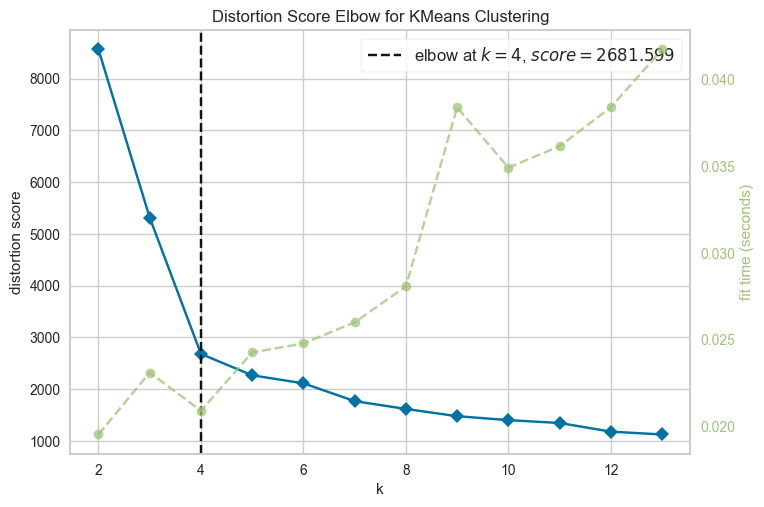

4


In [767]:
# e. Elbow Method
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer  
model = KMeans(random_state=42) 
visualiser = KElbowVisualizer(model,k=(2,14)) 
visualiser.fit(scaled_x) 
visualiser.show() 
plt.show()

# Extract the optimal number of clusters
k_cluster_number = visualiser.elbow_value_
print(k_cluster_number)

In [768]:
# f. Generate Clusters
kmeans = KMeans(n_clusters=k_cluster_number, random_state=42)
kmeans.fit(scaled_x)
predicted_label = kmeans.labels_
correct_labels = sum(predicted_label == encoded_y)


In [769]:
# g. Calculate silhouette scores
silhouette_score = silhouette_score(scaled_x, predicted_label)
print("Silhouette Score for k_cluster_number Clusters: ", silhouette_score)

Silhouette Score for k_cluster_number Clusters:  0.6313028738521101


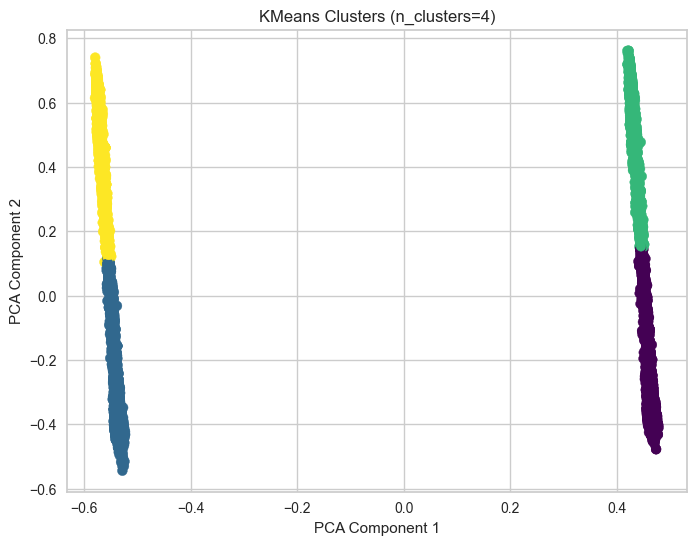

In [770]:
# h. Visualize the generated clusters.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
reduced_x = pca.fit_transform(scaled_x)

# Visualize the clusters
def plot_clusters(reduced_x, labels, n_clusters):
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_x[:, 0], reduced_x[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(f"KMeans Clusters (n_clusters={n_clusters})")
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Plotting clusters for each k
plot_clusters(reduced_x, predicted_label, k_cluster_number)
